# cv2学习笔记1
## 基本操作
### 读取图片cv2.imread

In [ ]:
import cv2
import numpy as np
img = cv2.imread('C:/Users/situ.st.1/Pictures/allensu.jpg') 
img = cv2.imread('C:/Users/situ.st.1/Pictures/allensu.jpg',0)#灰度图
img = cv2.imread('C:/Users/situ.st.1/Pictures/allensu.jpg',cv2.IMREAD_GRAYSCALE)#灰度图

print(img.shape)  #行，列，通道
print(img.size)   #像素数目
print(img.dtype)  #类型

cv2.namedWindow('liege') 
cv2.imshow('liege', img) 
cv2.waitKey(0) #如果不加这句，在IDLE中执行窗口直接无响应
cv2.destroyAllWindows() #释放窗口

(341L, 512L)
174592
uint8


- 另一种常用且强大的显示图像方法，使用matplotlib库包中的pyplot子包来显示，这种显示方法不但稳定，还可以调整大小、保存显示的图像等等。

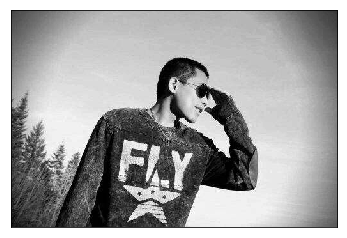

In [1]:
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('C:/Users/situ.st.1/Pictures/allensu.jpg',0);#打开为灰度图像
plt.imshow(img, 'gray') 
plt.xticks([]),plt.yticks([]) #隐藏坐标线 
plt.show() #显示出来

### 复制
```python
img1 = img.copy()
```   

### 保存cv2.imwrite                  
- 第一个参数是保存的路径及文件名
- 第二个是图像矩阵
- 第三个参数针对特定的格式： 
* 对于JPEG，其表示的是图像的质量，用0-100的整数表示，默认为95。   
* 对于PNG，第三个参数表示的是压缩级别。从0到9,压缩级别越高，图像尺寸越小。默认级别为3
```python
cv2.imwrite("C:/Users/situ.st.1/Pictures/mylove.png", img, [int(cv2.IMWRITE_PNG_COMPRESSION), 0])   
cv2.imwrite("C:/Users/situ.st.1/Pictures/mylove2.png", img, [int(cv2.IMWRITE_PNG_COMPRESSION), 9]) 
cv2.imwrite("C:/Users/situ.st.1/Pictures/mylove3.jpg", img, [int(cv2.IMWRITE_JPEG_QUALITY), 5])  
cv2.imwrite("C:/Users/situ.st.1/Pictures/mylove4.jpg", img, [int(cv2.IMWRITE_JPEG_QUALITY), 100])                    
``` 

## 访问像素
像素的访问和访问numpy中ndarray的方法完全一样
其中j，i分别表示图像的行和列,第三个数表示通道
```python
#灰度图只有两层
img[j,i]= 255
#BRG图像有三层
img[j,i,0]= 255  
img[j,i,1]= 255  
img[j,i,2]= 255 
```

### 分离通道
#### cv2.split

In [5]:
import cv2
import numpy as np
img = cv2.imread('C:/Users/situ.st.1/Pictures/allensu.jpg') 
b, g, r = cv2.split(img)  
cv2.imshow("Blue", b)  
cv2.imshow("Red", r)  
cv2.imshow("Green", g)  
cv2.waitKey(0)  
cv2.destroyAllWindows()  

#### 或者用数组的方法

In [ ]:
b = np.zeros((img.shape[0],img.shape[1]), dtype=img.dtype)  
g = np.zeros((img.shape[0],img.shape[1]), dtype=img.dtype)  
r = np.zeros((img.shape[0],img.shape[1]), dtype=img.dtype)  
  
b[:,:] = img[:,:,0]  
g[:,:] = img[:,:,1]  
r[:,:] = img[:,:,2] 

cv2.imshow("Blue", b)  
cv2.imshow("Red", r)  
cv2.imshow("Green", g)  
cv2.waitKey(0)  
cv2.destroyAllWindows()  

### 通道合并

In [ ]:

merged = cv2.merge([b,g,r]) #前面分离出来的三个通道 
print "Merge by OpenCV"   
print merged.strides  
print merged
cv2.imshow("merged", merged)  
cv2.waitKey(0)


### 图像的方法与缩小

In [2]:
import cv2
import numpy as np
img = cv2.imread('C:/Users/situ.st.1/Pictures/caoyuan.jpg') 
#CV_INTER_NN - 最近邻插值
#最基本、最简单的图像缩放算法，效果也是最不好的，放大后的图像有很严重的马赛克，缩小后的图像有很严重的失真；
#效果不好的根源就是其简单的最临近插值方法引入了严重的图像失真
#NN = cv2.resize(img,(512L,384L),interpolation=cv2.INTER_NN)
#cv2.imshow('NN',NN)

#CV_INTER_LINEAR - 双线性插值 (缺省使用)  
#比较好的图像缩放算法，它充分的利用了源图中虚拟点四周的四个真实存在的像素值来共同决定目标图中的一个像素值，
#因此缩放效果比简单的最邻近插值要好很多。
LINEAR = cv2.resize(img,(512L,384L),interpolation=cv2.INTER_LINEAR)
cv2.imshow('LINEAR',LINEAR)

#CV_INTER_AREA - 使用象素关系重采样。当图像缩小时候，该方法可以避免波纹出现。当图像放大时，类似于 CV_INTER_NN 方法.
AREA = cv2.resize(img,(512L,384L),interpolation=cv2.INTER_AREA)
cv2.imshow('AREA',AREA)
#CV_INTER_CUBIC - 立方插值. 
CUBIC = cv2.resize(img,(512L,384L),interpolation=cv2.INTER_CUBIC)
cv2.imshow('CUBIC',CUBIC)
cv2.waitKey(0)
cv2.destroyAllWindows() 

### 图像旋转

In [4]:
import cv2
import numpy as np
img = cv2.imread('C:/Users/situ.st.1/Pictures/allensu.jpg',0) 
rows,cols = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),4.813,1)
dst = cv2.warpAffine(img,M,(cols,rows))
cv2.imshow("rotation", dst)  
cv2.waitKey(0)

-1

### 加相框

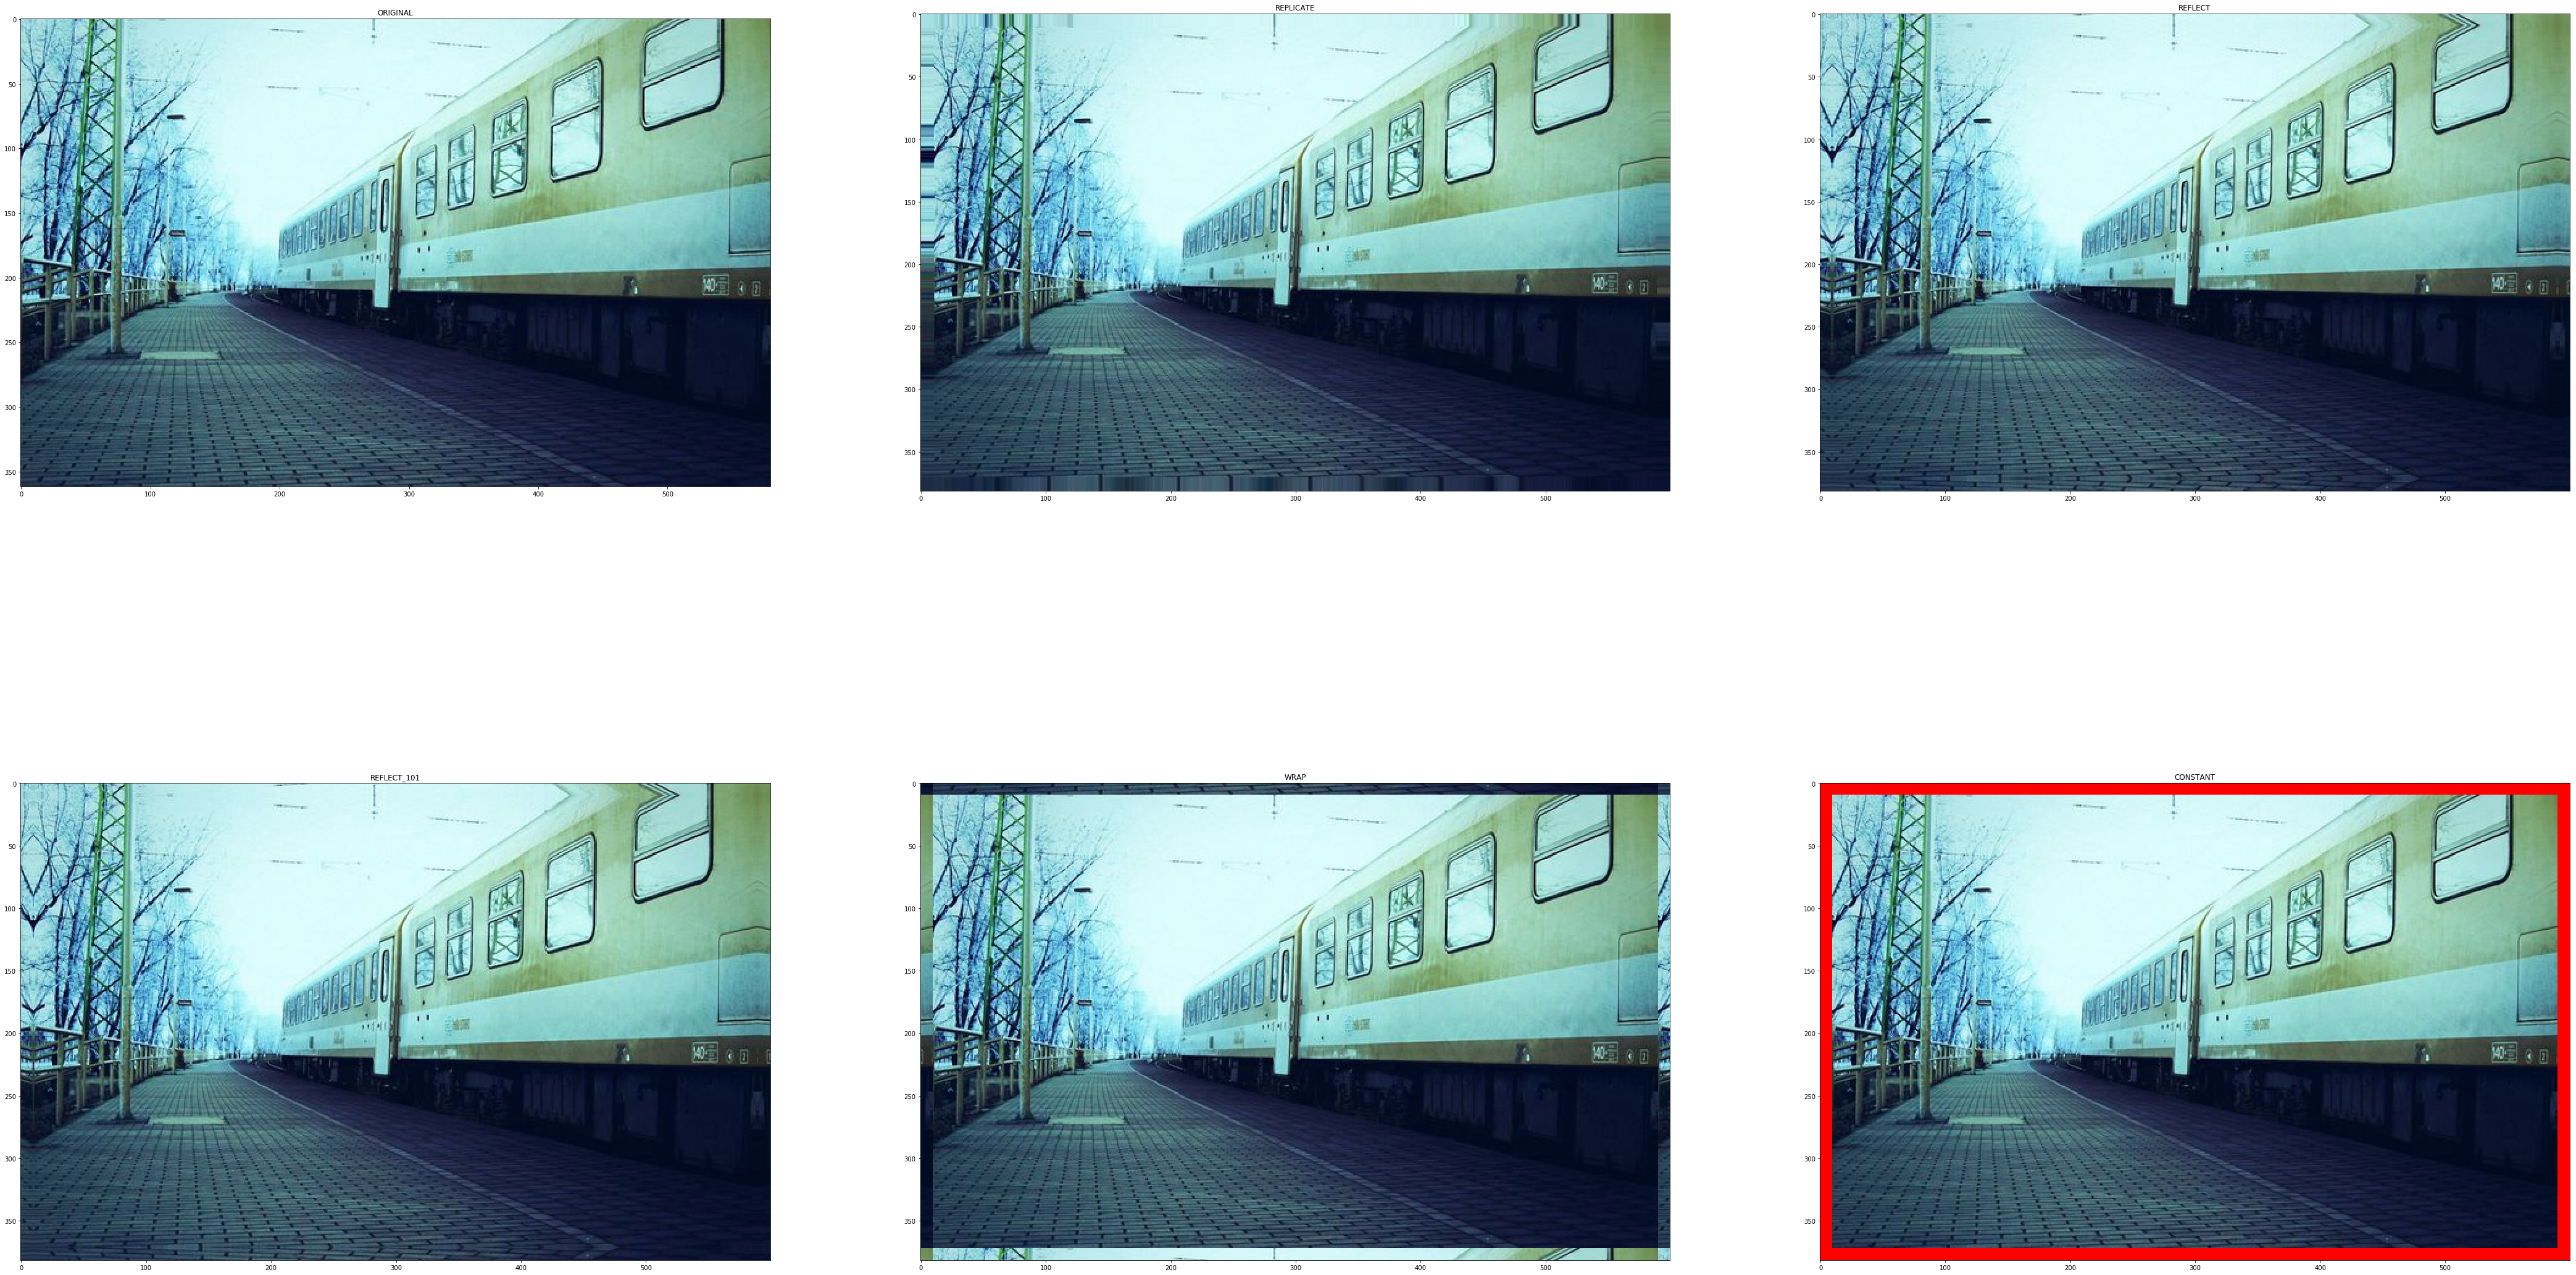

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
BLUE=[255,0,0]
img1=cv2.imread('C:/Users/situ.st.1/Pictures/beautiful/15.jpg') 

replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE) #重复最后一个元素
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT) #边界元素的镜像。比如: fedcba|abcdefgh|hgfedcb
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101) #跟上面一样，但稍作改动。例如: gfedcb|abcdefgh|gfedcba
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP) #镜像，但上下左右的边界与上面相反
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE) # 添加有颜色的常数值边界，还需要下一个参数（value）

plt.figure(figsize=(74,42)) 
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.show()